# Sleeping Time-Series Analysis

In [2]:
# Import Packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in the Dataset

df = pd.read_excel('Data/Time_Americans_Spend_Sleeping.xlsx')
df.head()

,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
0,2003,Annual,8.57,0.018,All days,15 years and over,Sleeping,Both
1,2004,Annual,8.55,0.026,All days,15 years and over,Sleeping,Both
2,2005,Annual,8.62,0.023,All days,15 years and over,Sleeping,Both
3,2006,Annual,8.63,0.024,All days,15 years and over,Sleeping,Both
4,2007,Annual,8.57,0.024,All days,15 years and over,Sleeping,Both


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      945 non-null    int64  
 1   Period                    945 non-null    object 
 2   Avg hrs per day sleeping  945 non-null    float64
 3   Standard Error            945 non-null    float64
 4   Type of Days              945 non-null    object 
 5   Age Group                 945 non-null    object 
 6   Activity                  945 non-null    object 
 7   Sex                       945 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 59.2+ KB


In [5]:
df.describe()

,Year,Avg hrs per day sleeping,Standard Error
count,945.000000,945.000000,945.000000
mean,2010.000000,8.806868,0.086958
std,4.322782,0.545001,0.034631
min,2003.000000,7.720000,0.018000
25%,2006.000000,8.360000,0.063000
50%,2010.000000,8.810000,0.084000
75%,2014.000000,9.190000,0.106000
max,2017.000000,10.650000,0.228000


## Exploratory Data Analysis

In [6]:
# Exploring the Year column

df['Year'].value_counts()

Year
2003    63
2004    63
2005    63
2006    63
2007    63
2008    63
2009    63
2010    63
2011    63
2012    63
2013    63
2014    63
2015    63
2016    63
2017    63
Name: count, dtype: int64

/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

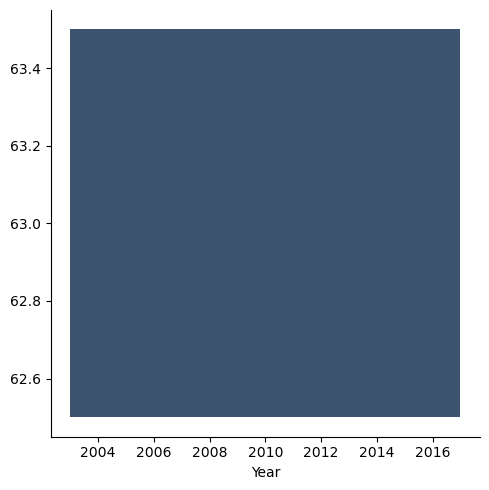

In [9]:
# Visualizing the Year Column

X_year = df['Year'].value_counts().index
Y_year = df['Year'].value_counts().values

sns.displot(x=X_year, y=Y_year)


